In [103]:
!pip install igraph
!apt-get -y install libcairo2-dev
!pip install pycairo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [104]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import string as str

import igraph as ig
from igraph import Graph
from igraph import *

g = nx.path_graph(3)
G = nx.convert_node_labels_to_integers(g,first_label=1)

h = nx.complete_graph(4)
mapping = dict(zip(h, str.ascii_lowercase))
H = nx.relabel_nodes(h, mapping)

Q = nx.tensor_product(G, H)

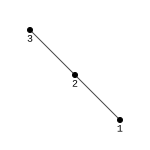

In [105]:
Gi = Graph.from_networkx(G)

visual_style = {}
visual_style["vertex_label"] = G
visual_style["vertex_color"] = "Black"
visual_style["vertex_size"] = 5
visual_style["vertex_label_dist"] = 2
visual_style["vertex_label_size"] = 10
visual_style["margin"] = 30
visual_style["bbox"] = (150, 150)
plot(Gi, "G_Tensor_G.png", **visual_style)

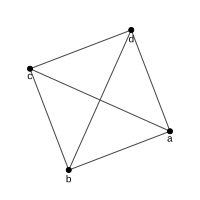

In [106]:
Hi = Graph.from_networkx(H)

visual_style = {}
visual_style["vertex_label"] = H
visual_style["vertex_color"] = "Black"
visual_style["vertex_size"] = 5
visual_style["vertex_label_dist"] = 2
visual_style["vertex_label_size"] = 10
visual_style["margin"] = 30
visual_style["bbox"] = (200, 200)
plot(Hi, "H_graph.png", **visual_style)

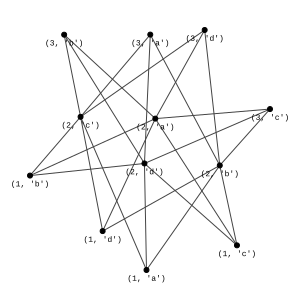

In [107]:
Qi = Graph.from_networkx(Q)

visual_style = {}
visual_style["vertex_label"] = Q
visual_style["vertex_color"] = "Black"
visual_style["vertex_size"] = 5
visual_style["vertex_label_dist"] = 2
visual_style["vertex_label_size"] = 8
visual_style["margin"] = 30
visual_style["bbox"] = (300, 300)
plot(Qi, "G_Tensor_H.png", **visual_style)

In [108]:
print("MATRIKS KETETANGGAAN Q")
a = nx.adjacency_matrix(Q)
A = a.toarray()
print(A)
n = Q.order()

Q = nx.convert_node_labels_to_integers(Q, first_label=0)
r = Q.nodes

T = nx.convert_node_labels_to_integers(Q, first_label=1)
t = T.nodes

MATRIKS KETETANGGAAN Q
[[0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 1 1 1]
 [1 0 1 1 0 0 0 0 1 0 1 1]
 [1 1 0 1 0 0 0 0 1 1 0 1]
 [1 1 1 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0]]


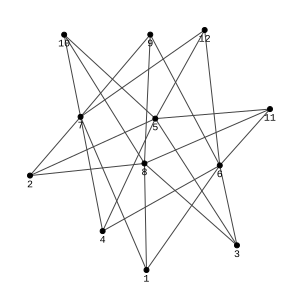

In [109]:
Qi = Graph.from_networkx(Q)

visual_style = {}
visual_style["vertex_label"] = t
visual_style["vertex_color"] = "Black"
visual_style["vertex_size"] = 5
visual_style["vertex_label_dist"] = 2
visual_style["vertex_label_size"] = 10
visual_style["margin"] = 30
visual_style["bbox"] = (300, 300)
plot(Qi, "Tensor_Relabeling.png", **visual_style)

In [110]:
print("MATRIKS JARAK Q")
distG = dict(nx.all_pairs_shortest_path_length(Q))
dG = np.empty((n, n))
for i in range(n):
    for j in range(n):
        dG[i][j] = distG[i][j]
print(dG)

MATRIKS JARAK Q
[[0. 2. 2. 2. 3. 1. 1. 1. 2. 2. 2. 2.]
 [2. 0. 2. 2. 1. 3. 1. 1. 2. 2. 2. 2.]
 [2. 2. 0. 2. 1. 1. 3. 1. 2. 2. 2. 2.]
 [2. 2. 2. 0. 1. 1. 1. 3. 2. 2. 2. 2.]
 [3. 1. 1. 1. 0. 2. 2. 2. 3. 1. 1. 1.]
 [1. 3. 1. 1. 2. 0. 2. 2. 1. 3. 1. 1.]
 [1. 1. 3. 1. 2. 2. 0. 2. 1. 1. 3. 1.]
 [1. 1. 1. 3. 2. 2. 2. 0. 1. 1. 1. 3.]
 [2. 2. 2. 2. 3. 1. 1. 1. 0. 2. 2. 2.]
 [2. 2. 2. 2. 1. 3. 1. 1. 2. 0. 2. 2.]
 [2. 2. 2. 2. 1. 1. 3. 1. 2. 2. 0. 2.]
 [2. 2. 2. 2. 1. 1. 1. 3. 2. 2. 2. 0.]]


In [111]:
print("DERAJAT SIMPUL Q")
degrees = np.sum(A, axis=1)
print(degrees)

DERAJAT SIMPUL Q
[3 3 3 3 6 6 6 6 3 3 3 3]


In [112]:
# ALGORITMA DSATUR
c = [-1] * n

def saturasi(n,dG,c):
    ls = {i: [] for i in range(n)}
    for i in range(n):
        for j in range(n):
            if(dG[i][j] <= 2 and c[j] != -1) :
                ls[i].append(c[j])
    uniq = []
    sat_node = []
    for i in range(n):
        uniq = set(ls[i])
        sat_node.append(len(uniq))
    return sat_node

def maks_saturasi(n,c):
    sat_node = saturasi(n,dG,c)
    ex = [i for i, nilai in enumerate(c) if nilai != -1]
    for i in range(n):
        if i in ex:
            sat_node[i]=0
    max_value = max(sat_node)
    index_max = [index for index, value in enumerate(sat_node) if value == max_value]
    index_max_sat = np.argmax(degrees[index_max])
    max_sat = index_max[index_max_sat]
    return max_sat

p=1
l=[]
sat = []
for i in range(n) :
    max_sat = maks_saturasi(n,c)
    sat.append(max_sat)
    if(c[max_sat] == -1) :
        for j in range(n):
            if(dG[max_sat][j] <= 2 and c[j] != -1):
                l.append(c[j])
        for k in range(1, p+1):
            if(k not in l):
                c[max_sat]=k
                break
        if(c[max_sat]==-1):
            p=p+1
            c[max_sat]=p
    l=[]

print("Number of saturation : ", sat)

Number of saturation :  [4, 5, 6, 7, 0, 8, 1, 9, 2, 10, 3, 11]


\ALGORITMA GREEDY:
BILANGAN KROMATIK :  8
SIMPUL :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
WARNA :  [1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 7, 8]


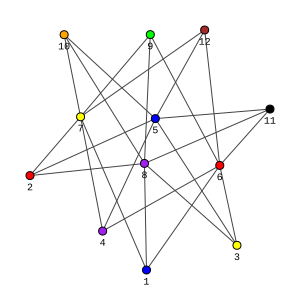

In [113]:
print("\ALGORITMA GREEDY:")
print("BILANGAN KROMATIK : ", p)
print("SIMPUL : ", t)
print("WARNA : ", c)

color_map = ["purple"]*(Q.number_of_nodes())
color_list = ["blue", "blue", "red", "yellow", "purple", "green", "orange", "black", "brown", "white", "lightcoral", "firebrick", "chocolate", "darkorange", "moccasin", "gold",  "darkolivegreen", "chartreuse", "forestgreen", "lime", "mediumaquamarine", "turquoise", "teal", "cadetblue", "dogerblue", "slateblue", "blueviolet", "magenta", "lightsteelblue", "crimson", "pink", "cian", "plum", "indigo"]

for i in Q.nodes:
    color_map[i] = color_list[c[i]]

T1 = Graph.from_networkx(Q)
visual_style = {}
visual_style["vertex_label"] = t
visual_style["vertex_color"] = color_map
visual_style["vertex_size"] = 8
visual_style["vertex_label_dist"] = 2
visual_style["vertex_label_size"] = 10
visual_style["margin"] = 30
visual_style["bbox"] = (300, 300)
plot(T1, "Distance2_Coloring.png", **visual_style)

In [114]:
t = np.array(t)
t = t.reshape(-1, 1)

c = np.array(c)
c = c.reshape(-1, 1)

s = np.concatenate((c, t), axis=1)
ss = np.array(sorted(s, key=lambda x: x[0]))

PI = np.split(ss[:,1], np.unique(ss[:,0], return_index=True)[1][1:])
for i in range(p):
    print(f"Kelas warna {i+1} : {PI[i]}")

Kelas warna 1 : [1 5]
Kelas warna 2 : [2 6]
Kelas warna 3 : [3 7]
Kelas warna 4 : [4 8]
Kelas warna 5 : [9]
Kelas warna 6 : [10]
Kelas warna 7 : [11]
Kelas warna 8 : [12]


In [115]:
pi = []
for i in range(n):
    rows = []
    for j in range(p):
        cols = []
        for k in PI[j]:
            cols.append(dG[i][k-1])
        rows.append(cols)
    pi.append(rows)

print("Kode warna :")
cc = []
for i in range(n):
    col = []
    for j in range(p):
        col.append(min(pi[i][j]))
    cc.append(col)
for i in range(n):
    print(f"Vertex {i+1} : {cc[i]}")

def cek_duplikat_set(cc):
    seen_sets = set()
    for set_i in cc:
        set_tuple = tuple(set_i)
        if set_tuple in seen_sets:
            return 1
        seen_sets.add(set_tuple)
    return 0

copy = cek_duplikat_set(cc)
if copy == 0:
  print("c MEMENUHI PEWARNAAN LOKASI GRAf Q")
else: print("c TIDAK MEMENUHI PEWARNAAN LOKASI GRAf Q")

Kode warna :
Vertex 1 : [0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0]
Vertex 2 : [1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0]
Vertex 3 : [1.0, 1.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0]
Vertex 4 : [1.0, 1.0, 1.0, 0.0, 2.0, 2.0, 2.0, 2.0]
Vertex 5 : [0.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0]
Vertex 6 : [1.0, 0.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0]
Vertex 7 : [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 3.0, 1.0]
Vertex 8 : [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 3.0]
Vertex 9 : [2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 2.0, 2.0]
Vertex 10 : [1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 2.0]
Vertex 11 : [1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 0.0, 2.0]
Vertex 12 : [1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 0.0]
c MEMENUHI PEWARNAAN LOKASI GRAf Q
